ANALISI DELLO SPETTRO DI AUTOVALORI E RELATIVI AUTOVETTORI DI ALCUNI RETICOLI TRIDIMENSIONALI

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import rigidpy as rp

In [88]:
df = pd.read_csv('/Users/edoardonaggi/Desktop/TESI/Analisi_3D/Unit_Cells.csv',",")
df = df.drop(index= [6129,8188,8190,8239,8904,8944,10843,12591,12989,13018,13283,13802,14239,14314],columns=['Unnamed: 0']) 
#15

/var/folders/s6/g_c9ym1d2gd6rlc73vvgwdgw0000gn/T/ipykernel_33145/1268992898.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/Users/edoardonaggi/Desktop/TESI/Analisi_3D/Unit_Cells.csv',",")


In [89]:
def string_toarray(dataframe,position1,position2,element):
    if element == "coordinates":
        array = dataframe.iloc[position1][position2]
        array = array.replace("[","")
        array = array.replace("]","")
        array = array.split(',')
        array = np.array(array)
        array = array.astype(float)
        dimensions = 3
        points = int(np.size(array)/dimensions)
        array = np.reshape(array,(points,dimensions))
    
        return array
    if element == "bonds":
        array = dataframe.iloc[position1][position2]
        array = array.replace("[","")
        array = array.replace("]","")
        array = array.split(',')
        array = np.array(array)
        array = array.astype(float)
        dimensions = 2
        points = int(np.size(array)/dimensions)
        array = np.reshape(array,(points,dimensions))
        array = array.astype(int)-1
        
        return array


In [90]:
def count_zeroeigenvalues(eigenvalues):
    k = 0
    for i in range(np.size(eigenvalues)):
        if eigenvalues[i] < np.exp(-22) : 
            k = k + 1
    
    return k
        

STUDIO DEL SIMPLE CUBE

In [91]:
coordinates = string_toarray(df,0,27,element="coordinates")
bonds = string_toarray(df,0,28,element="bonds")
F= rp.framework(coordinates,bonds,basis=[[3,0,0],[0,3,0],[0,0,3]])

Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)
print(Eigenvalues)
print(Eigenvectors)
print(coordinates)
print(count_zeroeigenvalues(Eigenvalues))

[]
[1.11022302e-15 1.11022302e-15 1.11022302e-15 1.11022302e-15
 1.11022302e-15 1.11022302e-15 1.11022302e-15 1.11022302e-15
 1.11022302e-15 1.11022302e-15 1.11022302e-15 1.11022302e-15
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00]
[[ 0.70710678  0.          0.          0.          0.          0.
   0.70710678  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.70710678  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.70710678  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.70710678  0.          0.          0.70710678  0.
   0.          0. 

In [92]:
def plotting_lattice(coordinates,bonds):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(coordinates[:,0],coordinates[:,1],coordinates[:,2], c='red', s=100)

    x= np.zeros((np.size(bonds[:,0]),2))
    y= np.zeros((np.size(bonds[:,0]),2))
    z= np.zeros((np.size(bonds[:,0]),2))


    for i in range(np.size(bonds[:,0])):
        x[i,0] = coordinates[bonds[i,0],0]
        x[i,1] = coordinates[bonds[i,1],0]
        y[i,0] = coordinates[bonds[i,0],1]
        y[i,1] = coordinates[bonds[i,1],1]
        z[i,0] = coordinates[bonds[i,0],2]
        z[i,1] = coordinates[bonds[i,1],2]

    for i in range(np.size(bonds[:,0])):
        ax.plot(x[i,:] , y[i,:], z[i,:], color='black')

    plt.show()

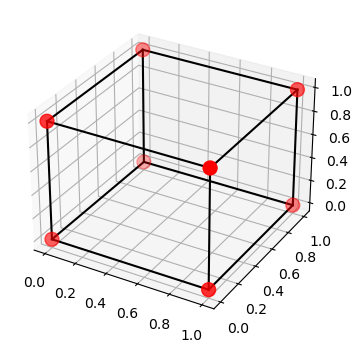

In [93]:
plotting_lattice(coordinates,bonds)

FUNZIONE FINALE, inserendo il nome del reticolo si ottiene la rappresentazione grafica, lo spettro di autovalori e autovettori ed il numero di autovalori nulli

In [94]:
def lattice_analysis(dataframe,cell_number):
    
    names = dataframe["Name"].tolist()
    """
    for i in range(len(names)):
        if names[i] == cell_name: cell_number = i
    """
    coordinates = string_toarray(dataframe,cell_number,27,element="coordinates")
    bonds = string_toarray(dataframe,cell_number,28,element="bonds")
    F= rp.framework(coordinates,bonds,basis=[[3,0,0],[0,3,0],[0,0,3]])

    Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)
    print("Nome reticolo: " + names[cell_number] + "Reticolo numero: " + str(cell_number))
    """
    plotting_lattice(coordinates,bonds)
    print("Autovalori della matrice: ")
    print(Eigenvalues)
    print("Autovettori della matrice: ")
    print(Eigenvectors)
    print("Numero di autovalori non triviali nulli: ")
    """

    Eigen_zero = count_zeroeigenvalues(Eigenvalues) - 6
    print(Eigen_zero)
    return Eigen_zero
   

In [95]:
lattice_analysis(df,4867)

[]
Nome reticolo: rt_Z06.0_E4868
Reticolo numero: 4867
122


122

In [96]:
Nontrivial = np.zeros(17248)
for i in range(17248):
    Nontrivial[i] = lattice_analysis(df,i)

[]
Nome reticolo: ub_Z06.0_E1
Reticolo numero: 0
6
[]
Nome reticolo: rt_Z08.0_E2
Reticolo numero: 1
6
[]
Nome reticolo: ub_Z08.0_E3
Reticolo numero: 2
13
[]
Nome reticolo: ex_Z08.0_E4
Reticolo numero: 3
4
[]
Nome reticolo: et_Z04.0_E5
Reticolo numero: 4
16
[]
Nome reticolo: ub_Z04.0_E6
Reticolo numero: 5
47
[]
Nome reticolo: et_Z10.0_E7
Reticolo numero: 6
4
[]
Nome reticolo: et_Z10.0_E8
Reticolo numero: 7
13
[]
Nome reticolo: rt_Z05.3_E9
Reticolo numero: 8
16
[]
Nome reticolo: rt_Z05.3_E10
Reticolo numero: 9
12
[]
Nome reticolo: et_Z05.6_E11
Reticolo numero: 10
12
[]
Nome reticolo: ex_Z05.0_E12
Reticolo numero: 11
18
[]
Nome reticolo: et_Z05.0_E13
Reticolo numero: 12
16
[]
Nome reticolo: et_Z12.0_E14
Reticolo numero: 13
3
[]
Nome reticolo: rig_Z12.0_E15
Reticolo numero: 14
31
[]
Nome reticolo: rt_Z06.7_E16
Reticolo numero: 15
12
[]
Nome reticolo: rt_Z06.7_E17
Reticolo numero: 16
14
[]
Nome reticolo: rt_Z06.7_E18
Reticolo numero: 17
12
[]
Nome reticolo: ub_Z12.0_E19
Reticolo numero: 18


In [97]:
df= df.assign(Non_trivials = Nontrivial)

In [103]:
df.to_csv('/Users/edoardonaggi/Desktop/TESI/Analisi_3D/Unit_Cells2.csv')


In [104]:
df2 = pd.read_csv('/Users/edoardonaggi/Desktop/TESI/Analisi_3D/Unit_Cells2.csv',",")
NT = df2["Non_trivials"].to_numpy()

/var/folders/s6/g_c9ym1d2gd6rlc73vvgwdgw0000gn/T/ipykernel_33145/4009569675.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df2 = pd.read_csv('/Users/edoardonaggi/Desktop/TESI/Analisi_3D/Unit_Cells2.csv',",")


Text(0.5, 1.0, 'Distribuzione della quantità di autovalori non triviali')

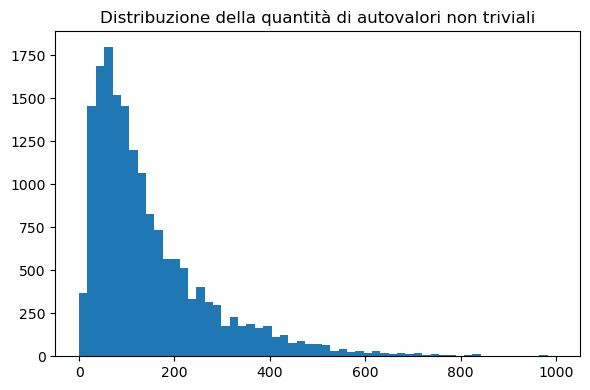

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(
    NT,
    bins=int(5754/100),
    range=(0,1000),
);

ax.set_title("Distribuzione della quantità di autovalori non triviali")

In [106]:
nx = df["nx"].to_numpy()
ny = df["ny"].to_numpy()
nz = df["nz"].to_numpy()

Text(0.5, 1.0, 'Confronto tra nz e autovalori non triviali nulli')

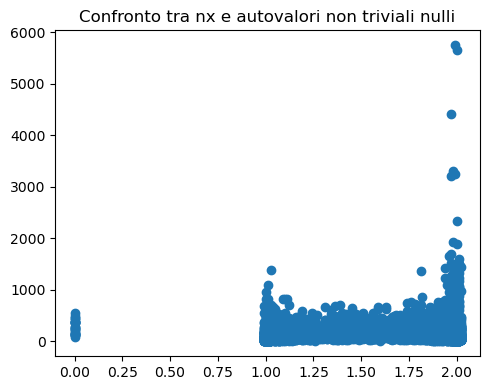

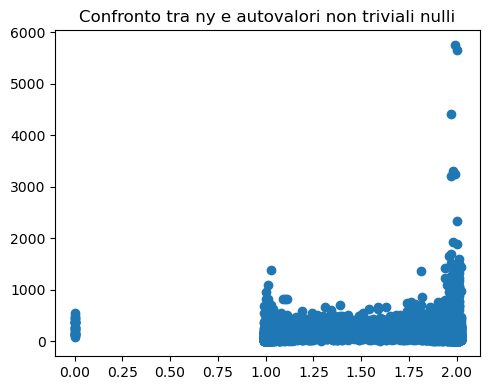

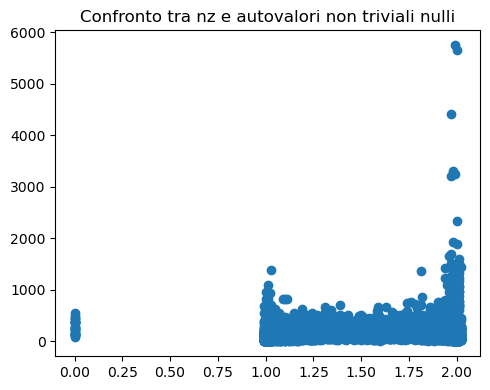

In [117]:
fig1, ax1 = plt.subplots(1, 1, figsize=(5,4))
ax1.scatter(nx,NT)
ax1.set_title("Confronto tra nx e autovalori non triviali nulli")
fig2, ax2 = plt.subplots(1, 1, figsize=(5,4))
ax2.scatter(ny,NT)
ax2.set_title("Confronto tra ny e autovalori non triviali nulli")
fig3, ax3 = plt.subplots(1, 1, figsize=(5,4))
ax3.scatter(nz,NT)
ax3.set_title("Confronto tra nz e autovalori non triviali nulli")

